In [2]:
import  os, sys
import pandas as pd
import pickle as pkl
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
import torch
from scipy import io

import matplotlib.pyplot as plt


In [3]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

In [4]:
data = pkl.load(open(r'/home/student/Desktop/Groundeep/networks/gdbn_trained_500_500.pkl','rb'))

In [5]:
data_points = pkl.load(open(r'/home/student/Desktop/Groundeep/batched_train_data_from_mat.pkl','rb'))

In [6]:
matlab_data = io.loadmat("/home/student/Desktop/Groundeep/NumStim_1to20_100x100_TR.mat")
D = matlab_data['D']  # Images data
N_list = matlab_data['N_list'].flatten()

In [48]:
D.shape

(10000, 33800)

In [9]:
# Reshape the array
reshaped_array = torch.tensor(data_points['data'].reshape(-1, 100,100),dtype = torch.float32)
reshaped_array.shape

torch.Size([65900, 100, 100])

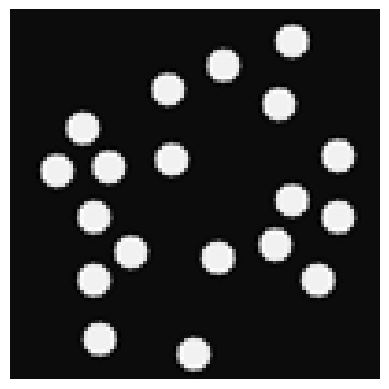

In [15]:
plt.imshow(reshaped_array[1,:,:], cmap='gray')  # You can choose a different colormap if needed
plt.axis('off')  # Hide the axis
plt.show()

In [22]:
weights= data.layers[0].W.detach().cpu()
weights.dtype

torch.float32

In [10]:

hid_bias = data.layers[0].hid_bias.detach().cpu()

In [38]:
activations_first = torch.nn.functional.sigmoid(torch.matmul(reshaped_array[0,:], weights) + hid_bias)

In [39]:
activations_first = activations_first.view(activations_first.shape[0],-1)

In [ ]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42,n_jobs = 32)
X_transformed = mds.fit_transform(activations_first)